In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))


In [4]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())


classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))


In [6]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [55]:
training_set = train_datagen.flow_from_directory(r'D:\dataset-picture\training',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary'#subset= "training"
                                                )

Found 26 images belonging to 2 classes.


In [56]:
test_set = test_datagen.flow_from_directory(r'D:\dataset-picture\test',
                                            target_size=(64, 64),
                                            batch_size=16,
                                            class_mode='binary'#subset= "validation"
                                           )

Found 22 images belonging to 2 classes.


In [57]:
test = test_datagen.flow_from_directory(r'D:\dataset-picture\test1',
                                            target_size=(64, 64),
                                            batch_size=16,
                                            class_mode='binary')

Found 17 images belonging to 2 classes.


In [53]:

classifier.fit_generator(training_set,
                         steps_per_epoch=2,
                         epochs=3,
                         validation_data=test_set,
                         validation_steps= 30 )
classifier.save('currnencymodel.h5');

<ipython-input-53-6de782bde3c9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/3
2/2 [==============================] - 1s 372ms/step - loss: 0.2901 - accuracy: 0.8846 - val_loss: 1.3253 - val_accuracy: 0.5455


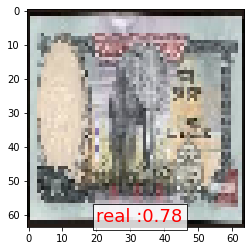

In [58]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('test\Real\images_1000.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='real :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='fake :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [59]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

<ipython-input-59-b73e22c98444>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = classifier.predict_generator(test_set)


In [60]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Fake\Nepali-counterfeit-currencies_20191121111...,0.34816,0,0
1,Fake\_counterteif.jpg,0.99840,0,1
2,Fake\d1-1000.jpg,0.91023,0,1
3,Fake\d1-500.jpg,0.75716,0,1
4,Fake\dupli.jpg,0.04519,0,0
5,Fake\duplicate.jpg,0.99994,0,1
6,Fake\fake note 500.jpg,0.18685,0,0
7,Fake\fake-1000.jpg,0.99873,0,1
8,Fake\fake-500.jpg,0.97303,0,1
9,Fake\fake.jpg,0.78064,0,1


In [61]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 10


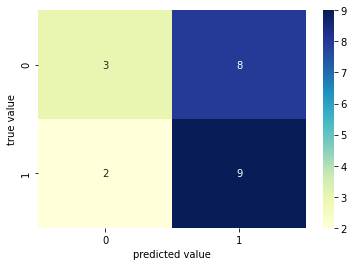

In [62]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

from sklearn.metrics import classification_report
print(classification_report(df.y,df.y_pred))

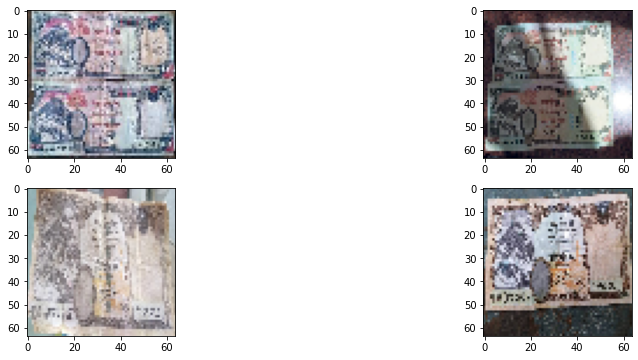

In [65]:
#Some of fake image misclassified as real.
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 2
rows = 2
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/' +CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

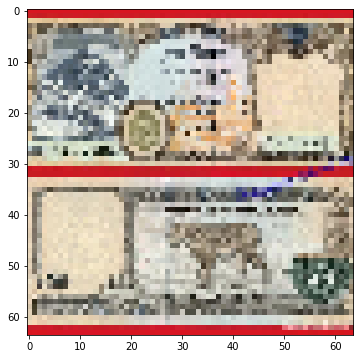

In [67]:


#Some of real image misclassified as fake.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 1
rows = 1
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()



In [69]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

import numpy as np
from keras.preprocessing import image


test_image = image.load_img(r'D:\dataset-picture\projects\dataset-picture\dollar.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices


if result[0][0] == 1:
     prediction = 'Real'
else:
    prediction = 'Fake'
print("ans: ",prediction)

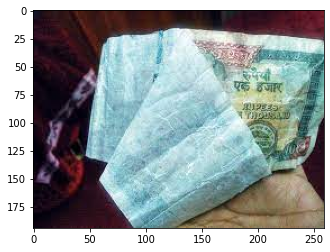

In [70]:
#Input Image for Layer visualization
from tensorflow.keras.preprocessing import image
img1 = image.load_img('test/Fake/fake.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('test/Fake/fake.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [71]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [72]:
from tensorflow.keras.models import Model
conv2d_4_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
conv2d_5_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_1').output)



In [73]:
conv2d_4_features = conv2d_4_output.predict(img)
conv2d_5_features = conv2d_5_output.predict(img)
print('First conv layer feature output shape : ',conv2d_4_features.shape)
print('First conv layer feature output shape : ',conv2d_5_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


single convolution filter output

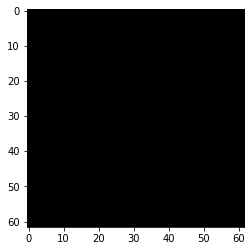

In [74]:


plt.imshow(conv2d_4_features[0, :, :, 4], cmap='gray')



first covolution layer output

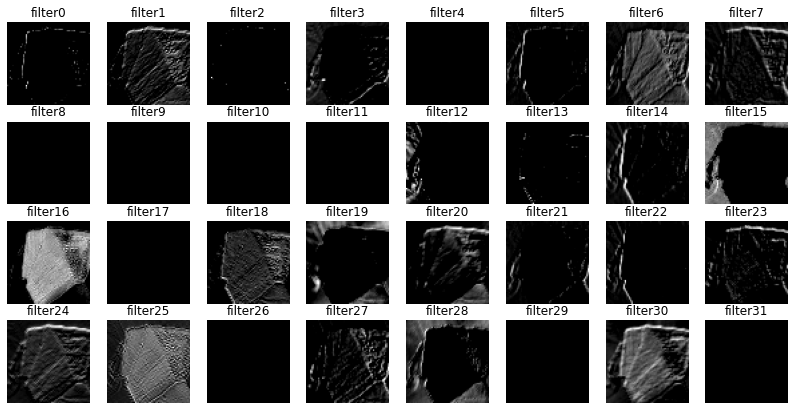

In [75]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_4_features[0, :, :, i], cmap='gray')
plt.show()

single convolution layer output

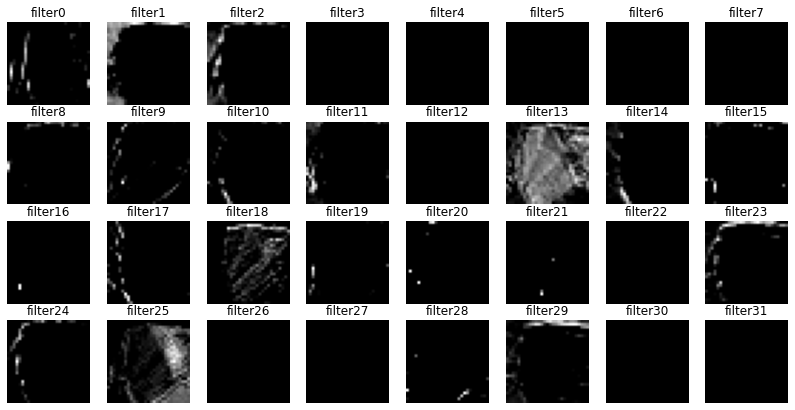

In [76]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_5_features[0, :, :, i], cmap='gray')
plt.show()

model performance on unseen data

<ipython-input-77-53555fea19c2>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ypred = classifier.predict_generator(test_set)


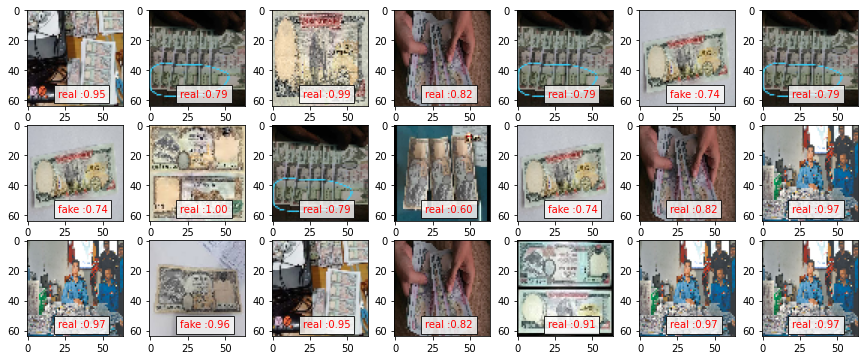

In [77]:
# for generator image set u can use 
ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('test1/'+test.filenames[np.random.choice(range(16))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='real :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='fake :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [78]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(training_set)
x2 = classifier.evaluate_generator(test_set)

In [79]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 92.31%     Training loss  : 0.259378
Validation Accuracy: 54.55%     Validation loss: 1.325348
